This notebook looks at the prediction skill of historical extreme drought periods in East Africa using EDM

-EMDAT

In [22]:
from pyEDM import *
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
# import os
import geopandas as gpd
# from shapely.geometry import Polygon
# import rasterio
# import xarray as xr
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# import fiona
# import rasterio.mask
# from rasterstats import zonal_stats
# from descartes import PolygonPatch
# from rasterio.plot import show
# from tqdm import tqdm
import matplotlib.dates as mdates
# import datetime as dt

In [16]:
croplands_vars_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/VariablesByLandCover/Variables_Croplands/'
EA_TS_DIR = '/home/rgreen/DroughtEDM/Data/EA_TS/Final/'
eMODIS_NDVI = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/eMODIS_NDVI/Resampled/'

Africa_simplex = '/home/rgreen/DroughtEDM/Data/Africa_simplex/' #out directory

In [6]:
ea_adminbds = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/AdminBoundaries/gadm36_EastAfrica.shp'
ea_bndry = gpd.read_file(ea_adminbds)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
Africa_basemap = world[world['continent'] == 'Africa']
EA_countries = ['Burundi', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Rwanda', 'Sudan', 'S. Sudan', 'Somalia', 'Somaliland', 'South Sudan', 'Tanzania', 'Uganda']
EastAfrica_basemap = world[world['name'].isin(EA_countries)]

In [67]:
in_kenya = ea_bndry['NAME_0'] == 'Kenya'
kenya_admin = ea_bndry[in_kenya]
#kenya_admin

in_ethiopia = ea_bndry['NAME_0'] == 'Ethiopia'
ethiopia_admin = ea_bndry[in_ethiopia]
ethiopia_admin

in_somalia = ea_bndry['NAME_0'] == 'Somalia'
somalia_admin = ea_bndry[in_somalia]
#somalia_admin

In [68]:
ethiopia_admin

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,layer,path,geometry
28,ETH,Ethiopia,ETH.1_1,Addis Abeba,ÄddÄ«s Äbaba|Addis Ababa|Adis-Abeba|ÄdÄ«s Ä...,None,Astedader,City,14,ET.AA,gadm36_ETH_1,/Users/rgreen/Documents/UCSB/Research/Data/Afr...,"POLYGON ((38.76156 8.85361, 38.75647 8.85324, ..."
29,ETH,Ethiopia,ETH.2_1,Afar,None,None,Kilil,State,02,ET.AF,gadm36_ETH_1,/Users/rgreen/Documents/UCSB/Research/Data/Afr...,"POLYGON ((41.79700 11.64572, 41.79087 11.60282..."
30,ETH,Ethiopia,ETH.3_1,Amhara,Amara,None,Kilil,State,03,ET.AM,gadm36_ETH_1,/Users/rgreen/Documents/UCSB/Research/Data/Afr...,"POLYGON ((37.67450 9.86192, 37.66693 9.85946, ..."
31,ETH,Ethiopia,ETH.4_1,Benshangul-Gumaz,Beneshangul Gumu,None,Kilil,State,06,ET.BE,gadm36_ETH_1,/Users/rgreen/Documents/UCSB/Research/Data/Afr...,"POLYGON ((34.54847 9.62966, 34.53214 9.59056, ..."
32,ETH,Ethiopia,ETH.5_1,Dire Dawa,None,None,Astedader,City,15,ET.DD,gadm36_ETH_1,/Users/rgreen/Documents/UCSB/Research/Data/Afr...,"POLYGON ((41.92615 9.66806, 41.93585 9.66346, ..."
33,ETH,Ethiopia,ETH.6_1,Gambela Peoples,Gambela,None,Kilil,State,12,ET.GA,gadm36_ETH_1,/Users/rgreen/Documents/UCSB/Research/Data/Afr...,"POLYGON ((35.18558 6.48975, 35.17385 6.46652, ..."
34,ETH,Ethiopia,ETH.7_1,Harari People,Hareri,None,Kilil,State,13,ET.HA,gadm36_ETH_1,/Users/rgreen/Documents/UCSB/Research/Data/Afr...,"POLYGON ((42.06133 9.22646, 42.05974 9.23765, ..."
35,ETH,Ethiopia,ETH.8_1,Oromia,Oromiya,None,Kilil,State,04,ET.OR,gadm36_ETH_1,/Users/rgreen/Documents/UCSB/Research/Data/Afr...,"POLYGON ((37.20057 7.28216, 37.18275 7.26486, ..."
36,ETH,Ethiopia,ETH.9_1,Somali,Sumale,None,Kilil,State,05,ET.SO,gadm36_ETH_1,/Users/rgreen/Documents/UCSB/Research/Data/Afr...,"POLYGON ((39.15871 3.49882, 39.15250 3.50189, ..."
37,ETH,Ethiopia,ETH.10_1,"Southern Nations, Nationalities and Peoples",SNNPR,None,Kilil,State,07,ET.SN,gadm36_ETH_1,/Users/rgreen/Documents/UCSB/Research/Data/Afr...,"POLYGON ((39.04503 6.14167, 39.03449 6.13744, ..."


In [8]:
zones_2019 = ['West Pokot', 'Tharaka-Nithi', 'Samburu', 'Nyeri', 'Marsabit', 'Mandera', 'Lamu', 'Laikipia', 'Kitui', 'Kilifi', 'Isiolo', 'Garissa', 'Embu', 'Baringo', 'Turkana', 'Wajir']

drought_2019 = kenya_admin['NAME_1'].isin(zones_2019)
kenya_drought_2019 = kenya_admin[drought_2019]    

In [9]:
samburu_bndry = kenya_admin['NAME_1'] == 'Samburu'
samburu = kenya_admin[samburu_bndry]

In [39]:
kenya_drought_2019.to_file(driver = 'ESRI Shapefile', filename = '/home/rgreen/DroughtEDM/Data/Historical_Drought_Regions/kenya_drought_2019.shp')

In [40]:
kenya_drought_2019_shp = '/home/rgreen/DroughtEDM/Data/Historical_Drought_Regions/kenya_drought_2019.shp'

# Plot simplex for admin2 zones that experienced drought

Samburu croplands

In [267]:
simplex_grasslands_samburu = Simplex(pathIn = EA_TS_FINAL, dataFile = 'KEN.37_1_ea_grasslands.csv', lib = '1 100', pred = '101 500', E = 2, columns = 'NDVI', target = 'NDVI', showPlot = False)
simplex_grasslands_samburu

,Time,Observations,Predictions
0,2005-04-11,134.924367,NaN
1,2005-04-21,139.162791,138.593726
2,2005-05-01,143.390378,144.546462
3,2005-05-11,146.254058,148.253491
4,2005-05-21,147.394827,148.531423
...,...,...,...
396,2016-04-11,133.766344,134.284900
397,2016-04-21,138.577368,137.092924
398,2016-05-01,144.478617,143.570307
399,2016-05-11,148.770685,149.908770


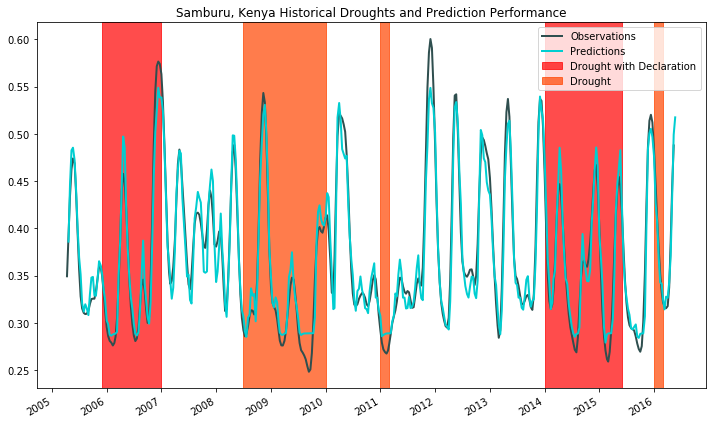

In [268]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(pd.to_datetime(simplex_grasslands_samburu.Time), (simplex_grasslands_samburu.Observations-100)/100, 'darkslategray', linewidth = 2, label = 'Observations')
ax.plot(pd.to_datetime(simplex_grasslands_samburu.Time), (simplex_grasslands_samburu.Predictions-100)/100, 'darkturquoise', linewidth = 2, label = 'Predictions')
ax.axvspan('2005-12-01', '2006-12-31', color='red', alpha=0.7, label = 'Drought with Declaration')
ax.axvspan('2008-07-01', '2009-12-31', color='orangered', alpha=0.7, label = 'Drought')
ax.axvspan('2011-01-01', '2011-02-28', color='orangered', alpha=0.7)
ax.axvspan('2014-01-01', '2015-05-31', color='red', alpha=0.7)
ax.axvspan('2016-01-01', '2016-02-28', color='orangered', alpha=0.7)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   
plt.gcf().autofmt_xdate()
plt.title('Samburu, Kenya Historical Droughts and Prediction Performance')
plt.tight_layout()
plt.legend(loc = 1)
plt.savefig('/home/rgreen/samburu_droughts.png')


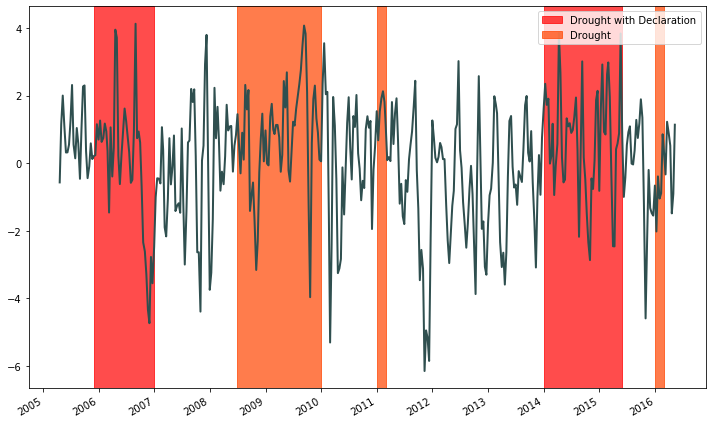

In [260]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(pd.to_datetime(simplex_grasslands_samburu.Time), simplex_grasslands_samburu.Predictions-simplex_grasslands_samburu.Observations, 'darkslategray', linewidth = 2)

ax.axvspan('2005-12-01', '2006-12-31', color='red', alpha=0.7, label = 'Drought with Declaration')
ax.axvspan('2008-07-01', '2009-12-31', color='orangered', alpha=0.7, label = 'Drought')
ax.axvspan('2011-01-01', '2011-02-28', color='orangered', alpha=0.7)
ax.axvspan('2014-01-01', '2015-05-31', color='red', alpha=0.7)
ax.axvspan('2016-01-01', '2016-02-28', color='orangered', alpha=0.7)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.legend(loc=1)
plt.savefig('/home/rgreen/samburu_droughts_residuals')

In [70]:
simplex_grasslands_laikipia = Simplex(pathIn = EA_TS_FINAL, dataFile = 'KEN.20_1_ea_grasslands.csv', lib = '1 100', pred = '101 500', E = 2, columns = 'NDVI', target = 'NDVI', showPlot = False)
simplex_grasslands_laikipia

,Time,Observations,Predictions
0,2005-04-11,138.295087,NaN
1,2005-04-21,142.596825,142.464025
2,2005-05-01,147.848240,149.348400
3,2005-05-11,152.811684,154.279621
4,2005-05-21,156.458837,155.678304
...,...,...,...
396,2016-04-11,138.325605,137.654942
397,2016-04-21,141.930996,141.995081
398,2016-05-01,148.838458,148.256095
399,2016-05-11,156.501484,155.254168


(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

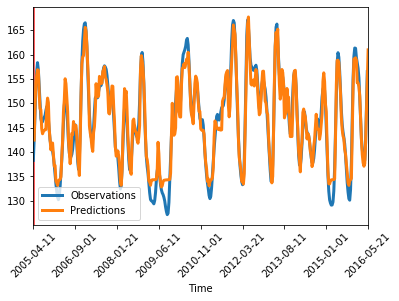

In [164]:
fig = plt.figure()
simplex_grasslands_laikipia.plot('Time', ['Observations', 'Predictions'], linewidth = 3 )

# plt.plot(simplex_grasslands_laikipia.Time, simplex_grasslands_laikipia.Observations)
# plt.plot(simplex_grasslands_laikipia.Time, simplex_grasslands_laikipia.Predictions)
plt.xticks(rotation=45)

In [73]:
simplex_grasslands_kilifi = Simplex(pathIn = EA_TS_FINAL, dataFile = 'KEN.14_1_ea_grasslands.csv', lib = '1 100', pred = '101 500', E = 2, columns = 'NDVI', target = 'NDVI', showPlot = False)
#simplex_grasslands_kilifi

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text xticklabel objects>)

<Figure size 432x288 with 0 Axes>

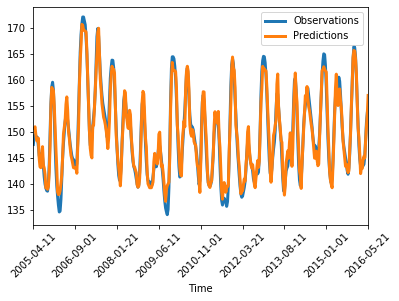

In [105]:
fig = plt.figure()

simplex_grasslands_kilifi.plot('Time', ['Observations', 'Predictions'], linewidth = 3 )
ax.axvspan('2008-04-11', '2008-05-21', color='red', alpha=0.5)
plt.xticks(rotation=45)

In [179]:
simplex_grasslands_kilifi.Time = pd.to_datetime(simplex_grasslands_kilifi.Time)
simplex_grasslands_kilifi.Time

0     2005-04-11
1     2005-04-21
2     2005-05-01
3     2005-05-11
4     2005-05-21
         ...    
396   2016-04-11
397   2016-04-21
398   2016-05-01
399   2016-05-11
400   2016-05-21
Name: Time, Length: 401, dtype: datetime64[ns]

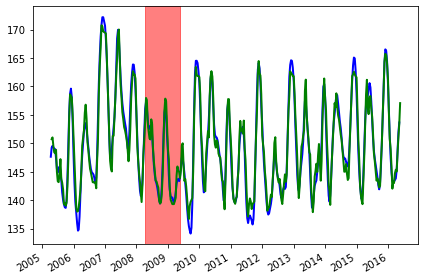

In [188]:
#prediction - observation
fig, ax = plt.subplots()
ax.plot(simplex_grasslands_kilifi.Time, simplex_grasslands_kilifi.Observations, 'b-', linewidth = 2)
ax.plot(simplex_grasslands_kilifi.Time, simplex_grasslands_kilifi.Predictions, 'g-', linewidth = 2)
ax.axvspan('2008-04-11', '2009-05-21', color='red', alpha=0.5)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   
plt.gcf().autofmt_xdate()

#plt.xticks(rotation=45)

#fig.autofmt_xdate()
plt.tight_layout()
plt.show()

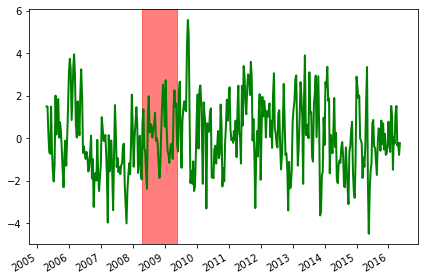

In [191]:
#prediction - observation
fig,ax = plt.subplots()
ax.plot(simplex_grasslands_kilifi.Time, simplex_grasslands_kilifi.Predictions-simplex_grasslands_kilifi.Observations, 'g-', linewidth = 2)
ax.axvspan('2008-04-11', '2009-05-21', color='red', alpha=0.5)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   
plt.gcf().autofmt_xdate()

#plt.xticks(rotation=45)

#fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# El Nino Ethiopia 2015-2017

In [14]:
oromia_bndry = ea_bndry['NAME_1'] == 'Oromia'
oromia = ea_bndry[oromia_bndry]
oromia #ETH.8_1

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,layer,path,geometry
35,ETH,Ethiopia,ETH.8_1,Oromia,Oromiya,None,Kilil,State,04,ET.OR,gadm36_ETH_1,/Users/rgreen/Documents/UCSB/Research/Data/Afr...,"POLYGON ((37.20057 7.28216, 37.18275 7.26486, ..."


In [48]:
simplex_croplands_afar = Simplex(pathIn = EA_TS_DIR, dataFile = 'ETH.2_1_ea_croplands.csv', lib = '1 100', pred = '101 500',
                                    E = 2, columns = 'NDVI', target = 'NDVI', showPlot = False)
simplex_croplands_amhara = Simplex(pathIn = EA_TS_DIR, dataFile = 'ETH.3_1_ea_croplands.csv', lib = '1 100', pred = '101 500',
                                    E = 2, columns = 'NDVI', target = 'NDVI', showPlot = False)
simplex_croplands_oromia = Simplex(pathIn = EA_TS_DIR, dataFile = 'ETH.8_1_ea_croplands.csv', lib = '1 100', pred = '101 500',
                                    E = 2, columns = 'NDVI', target = 'NDVI', showPlot = False)
#simplex_croplands_somali = Simplex(pathIn = EA_TS_DIR, dataFile = 'ETH.9_1_ea_croplands.csv', lib = '1 100', pred = '101 500',
                                    #E = 2, columns = 'NDVI', target = 'NDVI', showPlot = False)
simplex_croplands_southern = Simplex(pathIn = EA_TS_DIR, dataFile = 'ETH.10_1_ea_croplands.csv', lib = '1 100', pred = '101 500',
                                    E = 2, columns = 'NDVI', target = 'NDVI', showPlot = False)

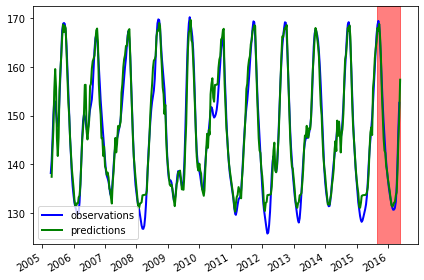

In [58]:
#prediction - observation
fig, ax = plt.subplots()
ax.plot(pd.to_datetime(simplex_croplands_oromia.Time), simplex_croplands_oromia.Observations, 'b-', linewidth = 2, label = 'observations')
ax.plot(pd.to_datetime(simplex_croplands_oromia.Time), simplex_croplands_oromia.Predictions, 'g-', linewidth = 2, label = 'predictions')
ax.axvspan('2015-09-01', '2016-05-21', color='red', alpha=0.5)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   
plt.gcf().autofmt_xdate()
plt.legend()
#plt.xticks(rotation=45)

#fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [32]:
simplex_grasslands_oromia

,Time,Observations,Predictions
0,2005-04-11,138.202204,NaN
1,2005-04-21,140.660497,137.421058
2,2005-05-01,145.081148,143.203384
3,2005-05-11,150.105053,147.116607
4,2005-05-21,153.061146,155.015994
...,...,...,...
396,2016-04-11,135.498869,134.242663
397,2016-04-21,141.022555,139.013195
398,2016-05-01,147.557218,145.203460
399,2016-05-11,152.643584,149.974788


In [49]:
amhara_elnino = simplex_croplands_oromia[(simplex_croplands_amhara['Time'] >= '2015-09-01') &
                                         (simplex_croplands_amhara['Time'] <= '2016-05-11')]
afar_elnino = simplex_croplands_oromia[(simplex_croplands_afar['Time'] >= '2015-09-01') &
                                         (simplex_croplands_afar['Time'] <= '2016-05-11')]
oromia_elnino = simplex_croplands_oromia[(simplex_croplands_oromia['Time'] >= '2015-09-01') &
                                         (simplex_croplands_oromia['Time'] <= '2016-05-11')]
southern_elnino = simplex_croplands_oromia[(simplex_croplands_southern['Time'] >= '2015-09-01') &
                                         (simplex_croplands_southern['Time'] <= '2016-05-11')]

In [51]:
oromia_elnino_error = ComputeError(list(oromia_elnino.Observations), list(oromia_elnino.Predictions))
amhara_elnino_error = ComputeError(list(amhara_elnino.Observations), list(amhara_elnino.Predictions))
southern_elnino_error = ComputeError(list(southern_elnino.Observations), list(southern_elnino.Predictions))
afar_elnino_error = ComputeError(list(afar_elnino.Observations), list(afar_elnino.Predictions))

In [56]:
print(oromia_elnino_error['rho'])
print(amhara_elnino_error['rho'])
print(southern_elnino_error['rho'])
print(afar_elnino_error['rho'])

0.9946432718018121
0.9946432718018121
0.9946432718018121
0.9946432718018121


# El Nino Somalia 2015-2017

In [60]:
def run_simplex(in_dir, filename, column):
    Simplex(pathIn = in_dir, dataFile = filename, lib = '1 100', pred = '101 500',
                                    E = 2, columns = column, target = column, showPlot = False)

In [66]:
simplex_grasslands_awdal = run_simplex(EA_TS_DIR, 'SOM.1_1_ea_croplands.csv', 'NDVI')

RuntimeError: ERROR: DataFrame::ReadData() Line 1 of file /home/rgreen/DroughtEDM/Data/EA_TS/Final/SOM.1_1_ea_croplands.csv does not have 7 columns.
